<a href="https://colab.research.google.com/github/pouyarahmti/Pytorch-Deep-Learning-Bootcamp/blob/main/04_PyTorch_Custom_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4. PyTorch Custom Datasets

how do you get your own data into PyTorch?

one of the ways to do so is by using PyTorch's `Dataset` class or PyTorch Custom Datasets.

### Domain Libraries
depending on the use case, Vision, Audio, or Text, you can use PyTorch's domain libraries for existing dataloader and functions.


## 0. Importing Pytorch and set device agnostic code

In [1]:
import torch
from torch import nn

print(torch.__version__)

2.2.1+cu121


In [2]:
# Device agnostic code

device = "cuda" if torch.cuda.is_available() else "cpu"

device

'cuda'

## 1. Get Data

In [3]:
import requests
import zipfile
from pathlib import Path

# Setup data path and download data
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

if image_path.is_dir():
  print(f"{image_path} directory exists.")
else:
  print(f"Did not find {image_path} directory, creating one...")
  image_path.mkdir(parents=True, exist_ok=True)

# Download pizza, steak and sushi

with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("Downloading pizza, steak and sushi data...")
  f.write(request.content)

# Unzip pizza, steak and sushi

with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
  print("Unzipping pizza, steak and sushi data...")
  zip_ref.extractall(image_path)

!ls data/pizza_steak_sushi


Did not find data/pizza_steak_sushi directory, creating one...
Unzipping pizza, steak and sushi data...
test  train


## 2. Becoming one with data (data preparation and data exploration)

In [4]:
import os
def walk_through_dir(dir_path):
  """ Walks through dir_path returning its contents. """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.


In [5]:
# Setup training and testing paths

train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

### 2.1 Visiualize some images

Let's write some code to visualize some images:
1. Get all the image paths
2. Choice a random image using python's `random.choice()`
3. Get the image class name using `Pathlib.path.parent.stem`
4. Display the image using python pillow

Random image path: data/pizza_steak_sushi/train/pizza/220190.jpg - class name: pizza 

Image mode: RGB
Image size: (382, 512)
Image height: 512
Image width: 382
Image format: JPEG


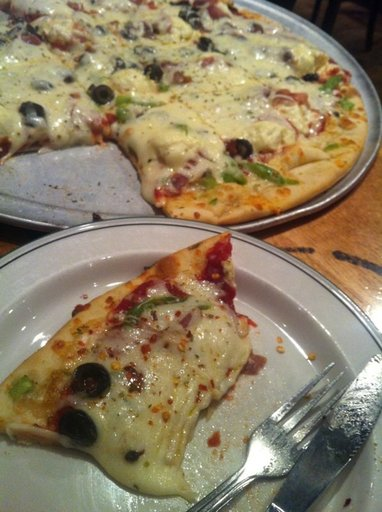

In [6]:
import random
from PIL import Image

# Set seed
# SEED = 42
# random.seed(SEED)

# 1. Get all image paths (* means "any extension")
image_paths = list(image_path.glob("*/*/*.jpg"))


# 2. Get random image path
random_image_path = random.choice(image_paths)

# 3. Get image class
class_name = random_image_path.parent.stem
print(f"Random image path: {random_image_path} - class name: {class_name} \n")

# 4. Open image

image = Image.open(random_image_path)

# 5. Print image details
print(f"Image mode: {image.mode}")
print(f"Image size: {image.size}")
print(f"Image height: {image.height}")
print(f"Image width: {image.width}")
print(f"Image format: {image.format}")

# 6. Show image
image

(-0.5, 381.5, 511.5, -0.5)

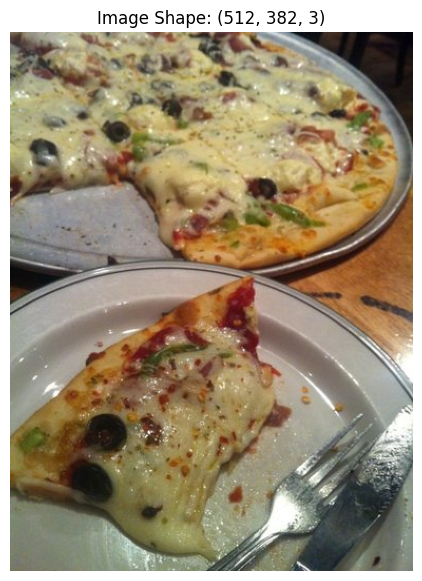

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(image)

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f'Image Shape: {img_as_array.shape}')
plt.axis(False)

## 3. Transforming Data into Tensors

before we can use PyTorch with our data, we need to transform it into a tensor.

2. Turn data into `torch.utils.data.Dataset`
3. Turn the data set into a `torch.utils.data.DataLoader`

In [8]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

### 3.1 Transforming data using torchvision.transforms

In [9]:
# Write a transform for image

data_transform = transforms.Compose([
    # Resize our images to 64 x 64
    transforms.Resize((64, 64)),
    # Flip the image horizontally
    transforms.RandomHorizontalFlip(p=0.5),
    # Turn image into a tensor
    transforms.ToTensor(),
])

In [10]:
data_transform(image).dtype

torch.float32

(None,)

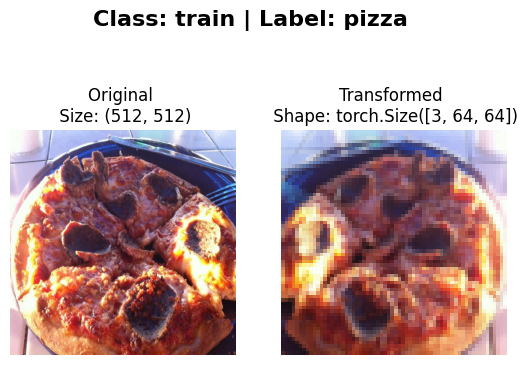

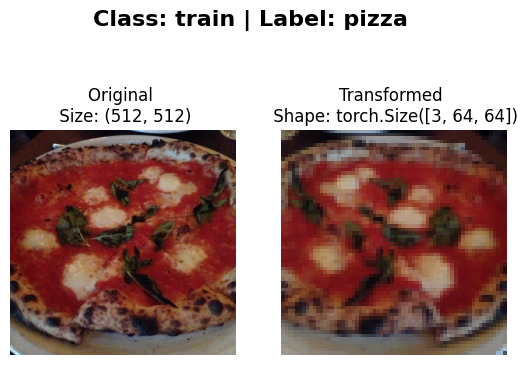

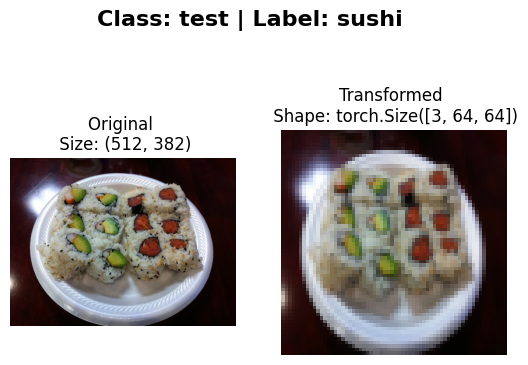

In [46]:
def plot_transformed_image(image_paths: list, transform, n=3, seed=42):
  """Plots `n` random images and their transformed versions."""

  # Set seed
  # random.seed(seed)


  random_image_paths = random.sample(image_paths, k=n)

  for image_path in random_image_paths:

    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows = 1, ncols = 2)

      ax[0].imshow(f)
      ax[0].set_title(f"Original \n Size: {f.size}")
      ax[0].axis(False)

      # Transform image
      transformed_image = transform(f)
      ax[1].imshow(transformed_image.permute(1, 2, 0)) # permute to go from {C, H, W} to {H, W, C}
      ax[1].set_title(f"Transformed \n Shape: {transformed_image.shape}")
      ax[1].axis(False)

      fig.suptitle(f"Class: {image_path.parent.parent.stem} | Label: {image_path.parent.stem}", fontweight = "bold", fontsize =16),


plot_transformed_image(image_paths, data_transform, n=3,),

## 4. Option 1 - Loading Image data using `ImageFolder`

we can load image classification data using `torchvision.datasets.ImageFolder`.

In [12]:
from torchvision import datasets

train_data = datasets.ImageFolder(train_dir,
                                  transform=data_transform, # A transform for images
                                  target_transform=None # A transform for targets ( labels )
                                  )

test_data = datasets.ImageFolder(test_dir,
                                  transform=data_transform, # A transform for images
                                  target_transform=None # A transform for targets ( labels )
                                  )


print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 75
    Root location: data/pizza_steak_sushi/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [13]:
# Get the class names
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [14]:
# Get class names as dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [15]:
# Check the length of the data
len(train_data), len(test_data)

(225, 75)

In [16]:
# Index on the train_data to get a single image and label
img, label = train_data[0][0], train_data[0][1]

print(f"Image Tensor : {img}")
print(f"Image shape : {img.shape}")
print(f"Label : {label}")
print(f"Class name : {class_names[label]}")
print(f"Image Type : {img.dtype}")

Image Tensor : tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.0

Original image shape : torch.Size([3, 64, 64])
Permuted image shape : torch.Size([64, 64, 3])


Text(0.5, 1.0, 'Class: pizza')

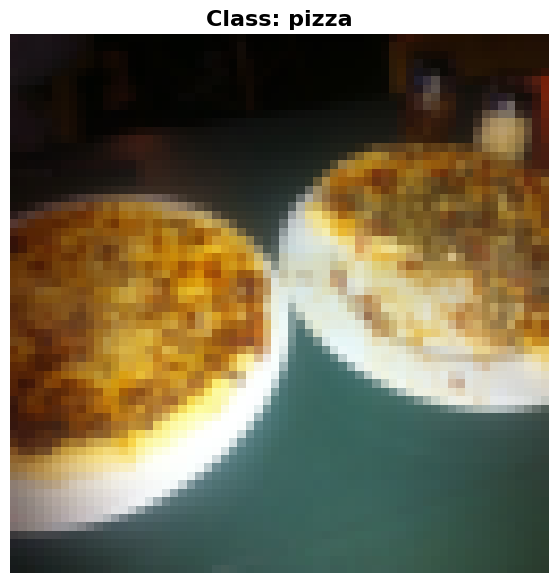

In [17]:
# Rearrange the dimensions

img_permuted = img.permute(1, 2, 0)

print(f"Original image shape : {img.shape}")
print(f"Permuted image shape : {img_permuted.shape}")

plt.figure(figsize=(10, 7))
plt.imshow(img_permuted)
plt.axis(False)
plt.title(f"Class: {class_names[label]}", fontweight = "bold", fontsize =16)


### 4.1 Turn the data into a DataLoader


A `DataLoader` is going to help us turn our `Datasets` into iterables and we can customise the `batch_size` and `shuffle` arguments so that we can train our model in batches.
                              

In [18]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset = test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)


print(f"Train dataloader: {train_dataloader} | Test dataloader: {test_dataloader}")

Train dataloader: <torch.utils.data.dataloader.DataLoader object at 0x7bb75e685840> | Test dataloader: <torch.utils.data.dataloader.DataLoader object at 0x7bb75e804790>


In [19]:
len(train_dataloader), len(test_dataloader)

(8, 3)

In [20]:
img, label = next(iter(train_dataloader))

print(f"Image shape: {img.shape} | Label: {label}")

Image shape: torch.Size([32, 3, 64, 64]) | Label: tensor([0, 1, 1, 0, 1, 1, 0, 2, 2, 2, 2, 1, 2, 0, 1, 0, 2, 2, 0, 1, 2, 2, 2, 0,
        0, 1, 2, 0, 0, 2, 0, 0])


## 5. Option 2: Loading data using a custom `Dataset` class

1. Want to be able to load images from file
2. Want to be able to get class naems from the Dataset
3. Want to be able to get the classes as dictionary from the Dataset


In [21]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

### 5.1 Creating a helper function to get class names

we want a function to:
1. get the class names using `os.scandir` to traverse the target directory
2. Raise an error if the target directory does not exist (class names are not available)
3. Turn the class names into dict and list and return them

In [22]:
# Setup path for target directory
target_dir = train_dir

print(f"Target directory: {target_dir}")

# Get the class namees from the target directory
class_names_found = sorted([entry.name for entry in os.scandir(target_dir)])

print(f"Class names: {class_names_found}")

Target directory: data/pizza_steak_sushi/train
Class names: ['pizza', 'steak', 'sushi']


In [23]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
  """Finds the class folder names in a target directory ."""

  # 1. Get the class names by scanning the target directory
  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

  # 2. Raise an error if class directories do not exist
  if not classes:
    raise FileNotFoundError(f"Couldn't find any classes in {directory}.")

  # 3. Crearte a dictionary of index labels (computers prefer numerical rather than string labels)
  class_to_idx = {class_name: i for i,class_name in enumerate(classes)}
  return classes, class_to_idx

In [24]:
find_classes(target_dir)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.2 Create a custom dataset to replicate the functionality of `torchvision.datasets.ImageFolder`

To create a custom dataset, we need to implement the following methods:
1. Subclass `torch.utils.data.Dataset` and implement the `__getitem__` and `__len__` methods.
2. Init the class with the path to the dataset as well as the transform to be applied to the images if any.
3. Create several attributes to store the images and their labels:
  * paths: list of paths to the images
  * transform: the transform to be applied to the images
  * classes: list of the classes in the dataset
  * class_to_idx: dictionary mapping the classes to their indices

4. Create a function to load images

5. Create a function to visualize images

In [25]:
# Write a custom dataset
from torch.utils.data import Dataset

# 1. Create a class that inherits Dataset
class ImageFolderCustom(Dataset):
  # 2. Initialize the class
  def __init__(self,
               target_dir: str,
               transform=None):
    # 3. Set class attributes
    # Get all the images paths
    self.paths = list(pathlib.Path(target_dir).glob("*/*.jpg"))

    # Set the transform
    self.transform = transform

    # Setup class names and class_to_idx
    self.classes, self.class_to_idx = find_classes(target_dir)

  # 4. Create Function to load images
  def load_image(self, index: int) -> Image.Image:
    "Opens an image from a file path and returns it."
    image_path = self.paths[index]
    # Open the image
    return Image.open(image_path)

  # 5. Override the __len__ method
  def __len__(self) -> int:
    return len(self.paths)

  # 6. Override the __getitem__ method
  def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
    """ Returns one sample of data, data and label (X, y)."""
    image = self.load_image(index)
    class_name = self.paths[index].parent.name # expects format: <class_name>/<image_name>.jpg
    class_idx = self.class_to_idx[class_name]

    # Transform if necessary
    if self.transform:
      return self.transform(image), class_idx
    else:
      return image, class_idx

In [26]:
# Create a transform

train_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
])

test_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

In [27]:
# Test out imageFolderCustom

train_data_custom = ImageFolderCustom(target_dir=train_dir,
                                      transform=train_transform)

test_data_custom = ImageFolderCustom(target_dir=test_dir,
                                      transform=test_transform)

In [28]:
len(train_data_custom), len(test_data_custom)

(225, 75)

In [29]:
train_data_custom[0][0].shape

torch.Size([3, 64, 64])

In [30]:
train_data.classes, train_data_custom.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.3 Create a function to display random images
  

In [31]:
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: List[str],
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):

  # 1. Set random seed
  if seed:
    random.seed(seed)

  if n > 10:
    n = 10
    display_shape = False
    print(f"For display purposes, n shouldn't be larger than 10. Setting it to 10")

  # Get random indexes
  random_samples_idx = random.sample(range(len(dataset)), k=n)

  # Setup plot
  plt.figure(figsize=(16, 8))

  # 2. Plot images
  for i, targ_sample_idx in enumerate(random_samples_idx):
    target_image, target_label = dataset[targ_sample_idx][0], dataset[targ_sample_idx][1]

    # Adjust target images to match matplotlib figure
    target_image_adjusted = target_image.permute(1, 2, 0)

    # 3. Plot image
    plt.subplot(1, n, i+1)
    plt.imshow(target_image_adjusted)
    plt.axis(False)
    if classes:
      title = f"Class: {classes[target_label]}"

    if display_shape:
      title = title + f"\nShape: {target_image_adjusted.shape}"

    plt.title(title)


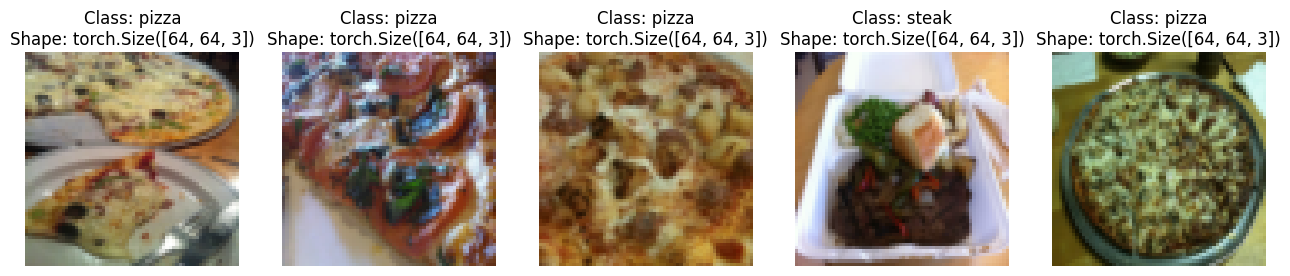

In [32]:
display_random_images(train_data_custom, class_names, n=5)

### 5.4 Turn our custom dataset into a DataLoader

In [33]:
# Create data loaders

BATCH_SIZE = 32

train_dataloader_custom = DataLoader(
    dataset=train_data_custom,
    batch_size=BATCH_SIZE,
    shuffle=True
    )

test_dataloader_custom = DataLoader(
    dataset=test_data_custom,
    batch_size=BATCH_SIZE,
    shuffle=False
    )


print(f"Train dataloader: {train_data_custom} | Test dataloader: {test_data_custom}")


Train dataloader: <__main__.ImageFolderCustom object at 0x7bb78c0138e0> | Test dataloader: <__main__.ImageFolderCustom object at 0x7bb75e807fa0>


In [34]:
# Get the image and label from the train dataloader

img, label = next(iter(train_dataloader_custom))

img.shape, label

(torch.Size([32, 3, 64, 64]),
 tensor([0, 1, 2, 2, 0, 0, 2, 2, 1, 1, 0, 1, 1, 0, 0, 2, 2, 2, 1, 0, 1, 0, 0, 0,
         2, 1, 2, 1, 2, 0, 2, 1]))

## 6. Other forms of transform (Data augmentation)

Data augmentation is the process of artificially adding diversity to your training data. This practice hopes to reduce overfitting and learns a model which can generalize well to unseen data.

In [36]:
# let's look at Trivial Augmentations

from torchvision import transforms

train_transform = transforms.Compose([
    transforms.Resize((224, 244)),
    transforms.TrivialAugmentWide(num_magnitude_bins=5),
    transforms.ToTensor(),
])

test_transform = transforms.Compose([
    transforms.Resize((224, 244)),
    transforms.ToTensor(),
])

In [37]:
image_path

PosixPath('data/pizza_steak_sushi')

In [43]:
image_path_list = list(image_path.glob("*/*/*.jpg"))



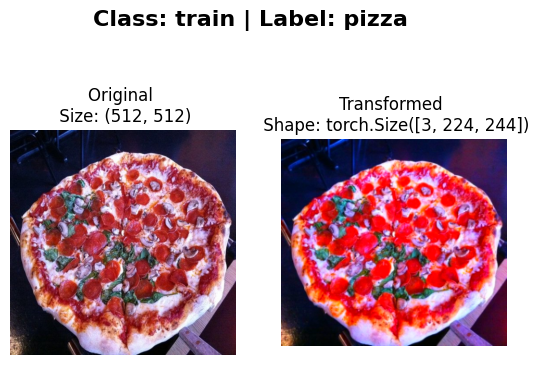

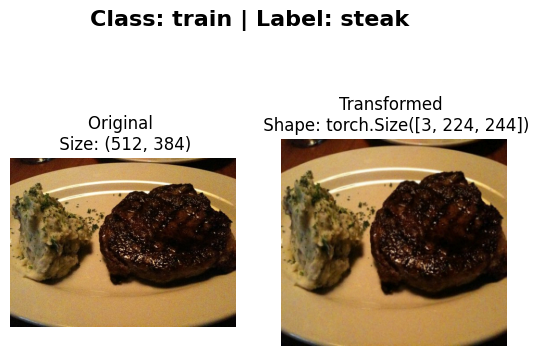

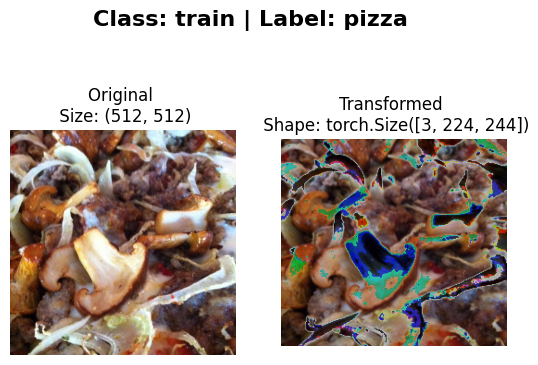

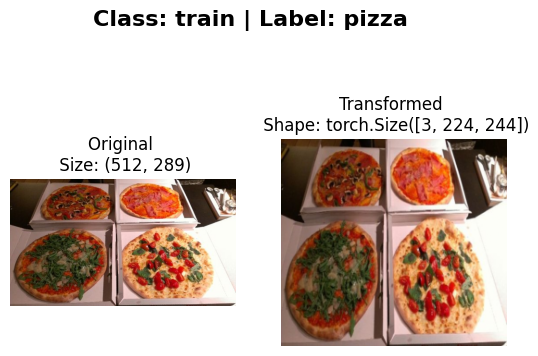

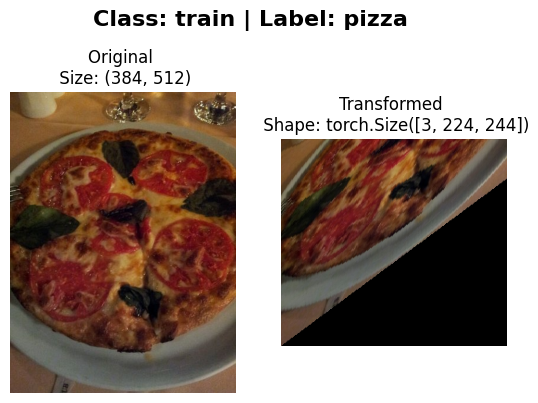

In [47]:
# Plot Transformed images

plot_transformed_image(image_path_list, train_transform, 10, 42)

## 7. Model 0: TinyVGG without Data Augmentation

### 7.1 Creating transforms and loading data for Model 0

In [48]:
# Create a transform

simple_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

In [49]:
# Load data

from torchvision.datasets import ImageFolder

train_data_simple = ImageFolder(root=train_dir, transform=simple_transform)
test_data_simple = ImageFolder(root=test_dir, transform=simple_transform)

In [52]:
# Turn data into DataLoader
import os
from torch.utils.data import DataLoader

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

train_dataloader_simple = DataLoader(train_data_simple,
                                     batch_size=BATCH_SIZE,
                                     num_workers=NUM_WORKERS,
                                     shuffle=True)


test_dataloader_simple = DataLoader(test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    num_workers=NUM_WORKERS,
                                    shuffle=False)

### 7.2. Create a model

In [91]:
class TinyVGG(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):


    super().__init__()
    self.conv_block_1 = nn.Sequential(
       nn.Conv2d(in_channels=input_shape,
                 out_channels=hidden_units,
                 kernel_size=3,
                 stride=1,
                 padding=0),
       nn.ReLU(),
       nn.Conv2d(in_channels=hidden_units,
                 out_channels=hidden_units,
                 kernel_size=3,
                 stride=1,
                 padding=0),
       nn.ReLU(),
       nn.MaxPool2d(kernel_size=2, stride=2)
    )
    self.conv_block_2 = nn.Sequential(
       nn.Conv2d(in_channels=hidden_units,
                 out_channels=hidden_units,
                 kernel_size=3,
                 stride=1,
                 padding=0),
       nn.ReLU(),
       nn.Conv2d(in_channels=hidden_units,
                 out_channels=hidden_units,
                 kernel_size=3,
                 stride=1,
                 padding=0),
       nn.ReLU(),
       nn.MaxPool2d(kernel_size=2, stride=2)
    )
    self.classifier = nn.Sequential(
       nn.Flatten(),
       nn.Linear(in_features=hidden_units * 13 * 13,
                 out_features=output_shape)
    )

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    x = self.conv_block_1(x)
    # print(x.shape)
    x = self.conv_block_2(x)
    # print(x.shape)
    x = self.classifier(x)
    # print(x.shape)
    return x


In [92]:
# Create an instance of the model
torch.manual_seed(42)

model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)

model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

### 7.3 Try forward pass on a single image (to test the model)

In [93]:
# get a single Image

image_batch, label_batch = next(iter(train_dataloader_simple))

In [94]:
image_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [97]:
try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo

In [98]:
from torchinfo import summary


summary(model_0, input_size=[1, 3, 64, 64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

### 7.4 Create Train and Test loop functions

In [103]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device: torch.device = device):
  # Put the model in train mode
  model.train()

  # Setup train loss and train accuracy values
  train_loss, train_acc = 0, 0

  # Loop through data loader data batches
  for batch, (X, y) in enumerate(dataloader):
    # Send data to target device
    X, y = X.to(device), y.to(device)

    # 1. Forward pass
    y_pred = model(X)

    # 2. Calculate loss
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Calculate and accumulate accuracy metric across all batches
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class == y).sum().item()/len(y_pred)

  # Adjust metrics to get average loss and accuracy per batch
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc


In [102]:
def test_step(
    model: torch.nn.Module,
    dataloader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
    device: torch.device = device):

  # Put the model in eval mode
  model.eval()

  # Setup test loss and test accuracy values
  test_loss, test_acc = 0, 0

  # Turn on inference context manager
  with torch.inference_mode():
    # Loop through DataLoader batches
    for batch, (X, y) in enumerate(dataloader):
      # Send data to target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      test_pred_logits = model(X)

      # 2. Calculate test loss and accuracy
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()

      # Calculate and accumulate accuracy
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

### 7.6 Create Train Function (Combine train_step & test_step)

In [104]:
from tqdm.auto import tqdm


def train(
    model: torch.nn.Module,
    train_dataloader: torch.utils.data.DataLoader,
    test_dataloader: torch.utils.data.DataLoader,
    optimizer: torch.optim.Optimizer,
    loss_fn: torch.nn.Module,
    epochs: int = 5,
    device: torch.device = device):

  # Create results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []
  }

  # Loop through training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(
        model=model,
        dataloader=train_dataloader,
        loss_fn=loss_fn,
        optimizer=optimizer,
        device=device
    )

    test_loss, test_acc = test_step(
        model=model,
        dataloader=test_dataloader,
        loss_fn=loss_fn,
        device=device)

    # Print out what's happening
    print(
        f"Epoch: {epoch+1} | "
        f"train_loss: {train_loss:.4f} | "
        f"train_acc: {train_acc:.4f} | "
        f"test_loss: {test_loss:.4f} | "
        f"test_acc: {test_acc:.4f}"
    )

    # Update results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  return results